<a href="https://colab.research.google.com/github/CornelioEmbedded/Self-Driving-Car/blob/main/Deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [17]:
np.random.seed(0)

In [18]:
n_pts = 500
X, Y = datasets.make_circles(n_samples = n_pts, random_state=123, noise=0.1, factor=0.2)


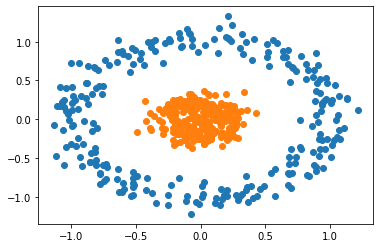

In [19]:
plt.scatter(X[Y == 0,0],X[Y == 0,1])
plt.scatter(X[Y == 1,0],X[Y == 1,1])

In [21]:
model = Sequential()
model.add(Dense(4, input_shape = (2,), activation = 'sigmoid'))
model.add(Dense(1, activation ='sigmoid'))
model.compile(Adam(learning_rate = 0.01), 'binary_crossentropy', metrics = ['acc'])

In [22]:
 h = model.fit(x=X, y=Y, verbose = 1, batch_size = 20, epochs = 100, shuffle = 'true')

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7016 - acc: 0.5780
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6947 - acc: 0.5820
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - acc: 0.6560
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - acc: 0.6340
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6900 - acc: 0.5700
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - acc: 0.6520
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6869 - acc: 0.6220
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - acc: 0.5000
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6779 - acc: 0.6500
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6729 - acc: 0.6440
Epoch 11/100
25/25 [==============================] - 0s 2m

Text(0.5, 1.0, 'accuracy')

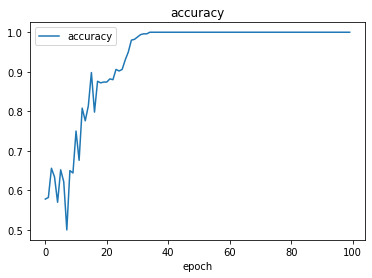

In [23]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

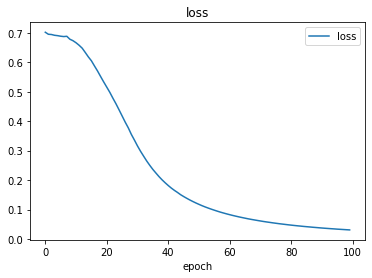

In [24]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [28]:
def plot_decision_boundary(X, y, model):
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 2ms/step


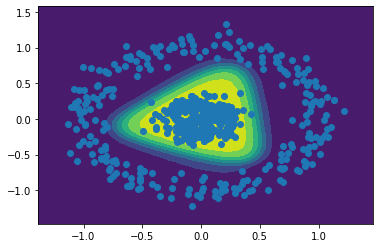

In [29]:
plot_decision_boundary(X,Y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 38ms/step
Prediction is:  [[0.98810166]]


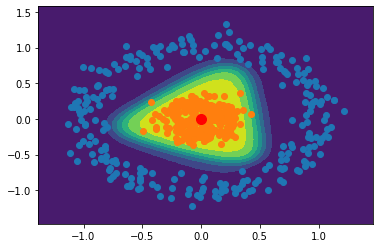

In [34]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
 
x = 0
y = 0
 
point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)